In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
import matplotlib.pyplot as plt
%matplotlib inline
df = df.loc[df['continent'] == "North America"]
len(df['location'].unique())


37

In [2]:
data_ms = df.groupby(['location']).mean()['male_smokers']
data_fms = df.groupby(['location']).mean()['female_smokers']
data_index = df.groupby(['location']).mean()['human_development_index']
data_poverty = df.groupby(['location']).mean()['extreme_poverty']
data_65 = df.groupby(['location']).mean()['aged_65_older']
data_70 = df.groupby(['location']).mean()['aged_70_older']
data_diabet = df.groupby(['location']).mean()['diabetes_prevalence']
data_hand = df.groupby(['location']).mean()['handwashing_facilities']
data_hospital = df.groupby(['location']).mean()['hospital_beds_per_thousand']
data_life= df.groupby(['location']).mean()['life_expectancy'] 
data_gdp = df.groupby(['location']).mean()['gdp_per_capita']
df['new'] = df['total_deaths']/df['population']
data_death = df.groupby(['location']).max()['new']

/tmp/ipykernel_7421/2431520741.py:13: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_death = df.groupby(['location']).max()['new']


In [3]:
data = pd.DataFrame({'female_smokers': data_fms, 'male_smokers': data_ms,'total_deaths' : data_death, 
        'human_development_index' : data_index, 'extreme_poverty' : data_poverty,'diabetes_prevalence': data_diabet, 'aged_65_older' : data_65
                    ,'aged_70_older' : data_70, 'hospital_beds_per_thousand' : data_hospital, 'handwashing_facilities': data_hand
                    ,'life_expectancy' : data_life, 'gdp_per_capita' : data_gdp}).reset_index()
data.isnull().sum()

location                       0
female_smokers                24
male_smokers                  25
total_deaths                   3
human_development_index       14
extreme_poverty               26
diabetes_prevalence            6
aged_65_older                 12
aged_70_older                 12
hospital_beds_per_thousand    14
handwashing_facilities        24
life_expectancy                0
gdp_per_capita                10
dtype: int64

In [4]:
data.dropna(subset=['aged_70_older'], inplace=True)
data.isnull().sum()
data.dropna(subset=['total_deaths'], inplace=True)
data.dropna(subset=['gdp_per_capita'], inplace=True)
data.isnull().sum()

location                       0
female_smokers                 9
male_smokers                  10
total_deaths                   0
human_development_index        1
extreme_poverty               10
diabetes_prevalence            0
aged_65_older                  0
aged_70_older                  0
hospital_beds_per_thousand     1
handwashing_facilities         9
life_expectancy                0
gdp_per_capita                 0
dtype: int64

In [5]:
len(data['location'].unique())

21

In [6]:
data['human_development_index'] = data['human_development_index']*100
x4 = data[['aged_65_older', 'life_expectancy','diabetes_prevalence', 'gdp_per_capita']]
y4 = data['total_deaths']*10000
data

,location,female_smokers,male_smokers,total_deaths,human_development_index,extreme_poverty,diabetes_prevalence,aged_65_older,aged_70_older,hospital_beds_per_thousand,handwashing_facilities,life_expectancy,gdp_per_capita
1,Antigua and Barbuda,NaN,NaN,0.001545,77.8,NaN,13.17,6.933,4.631,3.80,NaN,77.02,21490.943
2,Aruba,NaN,NaN,0.002544,NaN,NaN,11.62,13.085,7.452,NaN,NaN,76.29,35973.781
3,Bahamas,3.1,20.4,0.002015,81.4,NaN,13.17,8.996,5.200,2.90,NaN,73.92,27717.847
4,Barbados,1.9,14.5,0.001760,81.4,NaN,13.57,14.952,9.473,5.80,88.469,79.19,16978.068
5,Belize,NaN,NaN,0.001700,71.6,NaN,17.11,3.853,2.279,1.30,90.083,74.62,7824.362
9,Canada,12.0,16.6,0.001127,92.9,0.5,7.37,16.984,10.797,2.50,NaN,82.43,44017.591
11,Costa Rica,6.4,17.4,0.001696,81.0,1.3,8.78,9.468,5.694,1.13,83.841,80.28,15524.995
15,Dominican Republic,8.5,19.1,0.000394,75.6,1.6,8.20,6.981,4.419,1.60,55.182,74.08,14600.861
16,El Salvador,2.5,18.8,0.000666,67.3,2.2,8.87,8.273,5.417,1.30,90.650,73.32,7292.458
18,Grenada,NaN,NaN,0.001878,77.9,NaN,10.71,7.304,5.021,3.70,NaN,72.40,13593.877


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x4_train, y4_train)
coeff_df = pd.DataFrame(regressor.coef_, x4.columns, columns=['Coefficient'])
coeff_df

,Coefficient
aged_65_older,-0.038561
life_expectancy,-0.205845
diabetes_prevalence,1.059700
gdp_per_capita,0.000333


In [8]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(x4_test)
r2_score(y4_test,y_pred)

0.8428662562164668

coefficient of determination: 0.4198660581058513


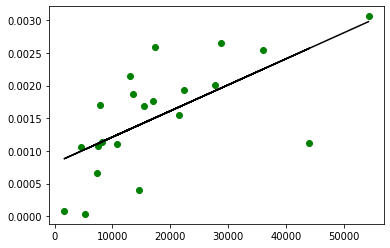

In [9]:
x3 = data['gdp_per_capita'].values.reshape((-1,1))
y3 = data['total_deaths'].values
model = LinearRegression()
model.fit(x3, y3)
r_sq = model.score(x3, y3)
print('coefficient of determination:', r_sq)
plt.scatter(x3, y3,color = 'green')
plt.plot(x3, model.predict(x3), color='black')

In [10]:
end = pd.DataFrame({'Actual': y4_test, 'Predicted': y_pred})
end

,Actual,Predicted
16,6.658044,10.474147
22,11.309569,13.036913
35,30.626240,26.719077
2,25.437411,22.140655
20,0.765228,8.296446


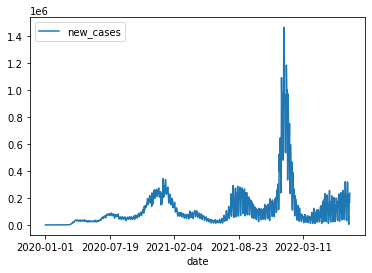

In [11]:
cases = df.groupby(['date']).sum()['new_cases'].reset_index()
cases.columns =['date', 'new_cases']
cases.plot(x = 'date', y = 'new_cases')
plt.show()

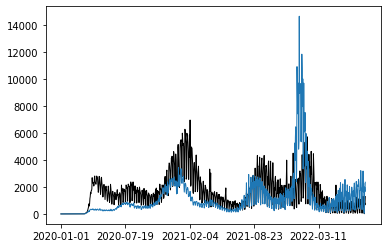

In [12]:
import matplotlib.ticker as ticker
new_death = df.groupby(['date']).sum()['new_deaths'].reset_index()
new_death.columns =['date', 'new_deaths']
x = cases['date']
y1 = cases['new_cases']/100
y2 = new_death['new_deaths']
fig, ax = plt.subplots()


ax.plot(x, y2, color = 'black', linewidth = 1)
ax.plot(x, y1,  linewidth = 1)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))


fig.set_figwidth(6)
fig.set_figheight(4)

plt.savefig('north.png')